In [36]:
import numpy as np
import scipy.special
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from scipy.stats import chisquare
import cv2 as cv
img = cv.imread('img1.jpg')
img1 = cv.imread('img2.jpg')
img2 = cv.imread('img3.jpg')

In [6]:
hist_blue = cv.calcHist([img],[0],None,[256],[0,256]) 
hist_green = cv.calcHist([img],[1],None,[256],[0,256]) 
hist_red = cv.calcHist([img],[2],None,[256],[0,256]) 

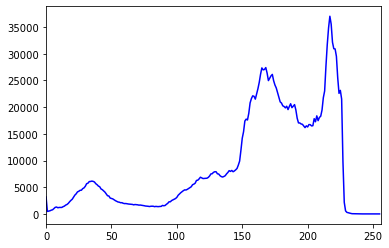

In [7]:
plt.plot(hist_blue, color = 'b')
plt.xlim([0,256])
plt.show()

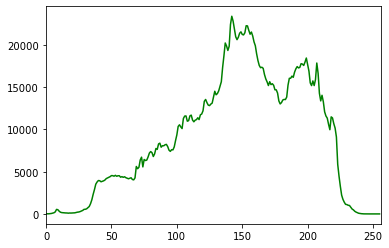

In [8]:
plt.plot(hist_green, color = 'g')
plt.xlim([0,256])
plt.show()

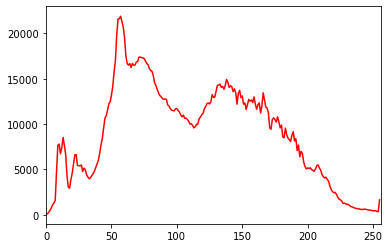

In [9]:
plt.plot(hist_red, color = 'r')
plt.xlim([0,256])
plt.show()

In [11]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

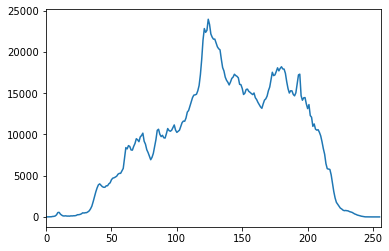

In [12]:
hist_gray = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist_gray)
plt.xlim([0,256])
plt.show()

In [13]:
def getCummulativeDis(hist):
    c = [] #cummulative distribution
    s = 0
    for i in range(0, len(hist)):
        s = s + hist[i]
        c.append(s)
    return c

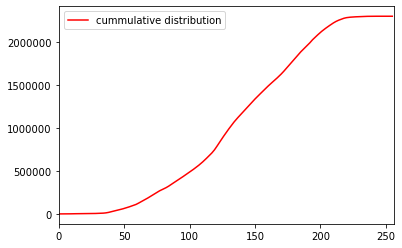

In [14]:
c = getCummulativeDis(hist_gray)
plt.plot(c, label = 'cummulative distribution', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.show()

In [15]:
img_equ = cv.equalizeHist(img_gray)

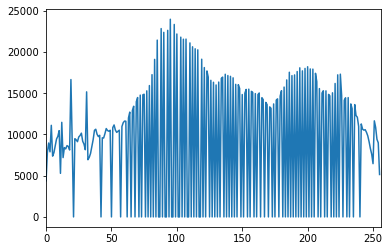

In [16]:
hist_equ = cv.calcHist([img_equ],[0],None,[256],[0,256])
plt.plot(hist_equ)
plt.xlim([0,256])
plt.show()

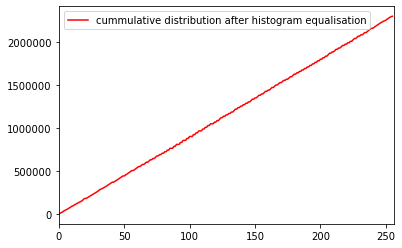

In [17]:
c_equ = getCummulativeDis(hist_equ)
plt.plot(c_equ, label = 'cummulative distribution after histogram equalisation', color = 'r')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.show()

In [18]:
img_equalisation = np.hstack((img_gray, img_equ)) #stacking images side-by-side
cv.imwrite('img_equalisation.png', img_equalisation) #writing the stacked image to file

True

In [19]:
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [20]:
histgrey1 = cv.calcHist([img_gray],[0],None,[256],[0,256]) 
histgrey2 = cv.calcHist([img1_gray],[0],None,[256],[0,256]) 
histgrey3 = cv.calcHist([img2_gray],[0],None,[256],[0,256]) 

### Chi-Square

In [44]:
# Function to calculate Chi-distance
def chi2_distance(A, B):
 
    # compute the chi-squared distance using above formula
    chi = np.sum([(((a+0.000001) - (b+0.000001)) ** 2) / ((a+0.000001) + (b+0.000001))
                      for (a, b) in zip(A, B)])
 
    return chi

In [45]:
print(chi2_distance(histgrey1,histgrey2))
print(chi2_distance(histgrey2,histgrey3))
print(chi2_distance(histgrey1,histgrey3))

0.6800027
0.36333728
0.6225392


### KL Divergence 

In [29]:
histgrey1 = histgrey1 / np.linalg.norm(histgrey1, ord=1)
histgrey2 = histgrey2 / np.linalg.norm(histgrey2, ord=1)
histgrey3 = histgrey3 / np.linalg.norm(histgrey3, ord=1)

In [30]:
klc1=print(cv.compareHist(histgrey1,histgrey2,cv.HISTCMP_KL_DIV))
klc2=print(cv.compareHist(histgrey2,histgrey3,cv.HISTCMP_KL_DIV))
klc3=print(cv.compareHist(histgrey1,histgrey3,cv.HISTCMP_KL_DIV))

1.0689814681738345
0.4695592442408143
0.8453829247155048


In [31]:
klc11=print(cv.compareHist(histgrey2,histgrey1,cv.HISTCMP_KL_DIV))
klc22=print(cv.compareHist(histgrey3,histgrey2,cv.HISTCMP_KL_DIV))
klc33=print(cv.compareHist(histgrey3,histgrey1,cv.HISTCMP_KL_DIV))

0.8029711567902853
2.872613790698017
0.8568692706110097
